<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/2_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week #2 Image Formation, Colors, Point Operations

In [1]:
!wget https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe -O kitty.jpg
!wget https://drive.google.com/uc?id=18oft21cCMRsIYwJ0-abLc3mrWAonHGSW -O rgb.png

--2024-09-20 08:51:41--  https://drive.google.com/uc?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.google.com (drive.google.com)... 74.125.142.139, 74.125.142.102, 74.125.142.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe [following]
--2024-09-20 08:51:41--  https://drive.usercontent.google.com/download?id=1Yox-XWM-PY9vFtDdzB_y_U3SK2paewwe
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79570 (78K) [image/jpeg]
Saving to: ‘kitty.jpg’

kitty.jpg           100%[===================>]  77.71K  --.-KB/s    in 0.002s  

2024-09-20 08:51:43 (40.3 MB/s) - ‘kitty.jpg’ saved

## Exercise #1 Quantization
* 2 bits

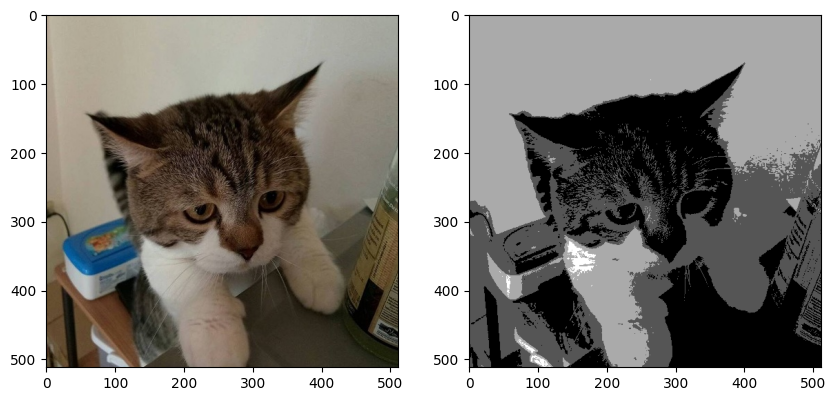

In [4]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np
%matplotlib inline


img = io.imread("kitty.jpg")
gray = color.rgb2gray(img)
# TO DO: Quantize the grayscale image to have 2 bits or 4 colors
gray_255 = np.multiply(gray, 255)
gray_255[gray_255 < 64] = 0
gray_255[(gray_255 >= 64) & (gray_255 < 128)] = 1
gray_255[(gray_255 >= 128) & (gray_255 < 192)] = 2
gray_255[gray_255 >= 192] = 3


plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(gray_255, cmap="gray")
plt.show()


* Quantize an image to be represented by 1 bit

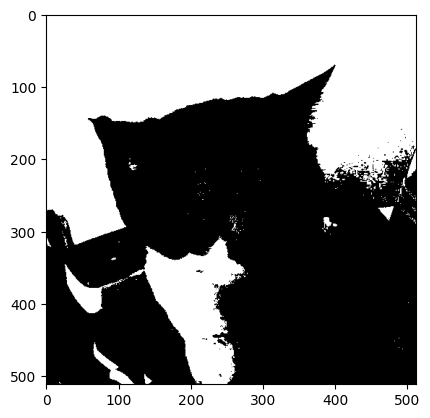

In [5]:
gray_255 = np.multiply(gray, 255)
gray_255[gray_255 < 128] = 0
gray_255[gray_255 >= 128] = 1
plt.imshow(gray_255, cmap="gray")
plt.show()

## Exercise #2 Shrink and Zoom
* Shrink an image to 64 x 64
* Zoom in an image to 1000 x 1000

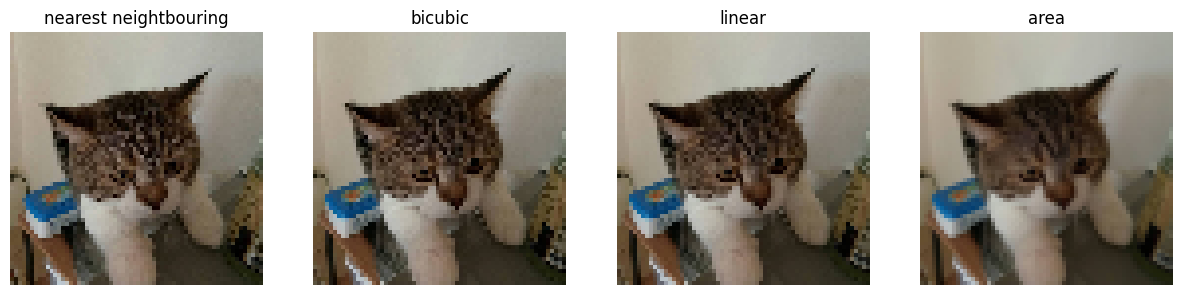

In [6]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

# Shrink
SIZE = 64

img = cv2.imread("kitty.jpg")
img_resize_nn = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
img_resize_bc = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_CUBIC)

# TO DO : Try with AREA & LINEAR INTERPOLATION TECHNIQUES
img_resize_lp = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_LINEAR)
img_resize_ar = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_AREA)

# Write your code to visualize the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_resize_nn[:,:,::-1])
plt.title("nearest neightbouring")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(img_resize_bc[:,:,::-1])
plt.title("bicubic")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(img_resize_lp[:,:,::-1])
plt.title("linear")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(img_resize_ar[:,:,::-1])
plt.title("area")
plt.axis('off')

plt.show()

In [7]:
img_resize_nn.shape

(64, 64, 3)

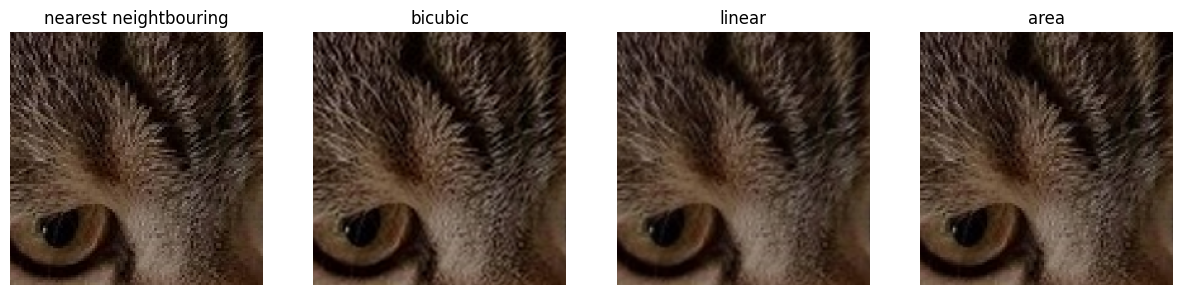

In [12]:
import cv2
import matplotlib.pyplot as plt
from skimage import io, color
import numpy as np

# Zoom in
SIZE = 1000
img_resize_nn = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_NEAREST)
img_resize_bc = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_CUBIC)
img_resize_lp = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_LINEAR)
img_resize_ar = cv2.resize(img,(SIZE,SIZE),interpolation=cv2.INTER_AREA)

img_resize_nn = img_resize_nn[400:600, 400:600, :]
img_resize_bc = img_resize_bc[400:600, 400:600, :]
img_resize_lp = img_resize_lp[400:600, 400:600, :]
img_resize_ar = img_resize_ar[400:600, 400:600, :]

# Write your code to visualize the results
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_resize_nn[:,:,::-1])
plt.axis('off')
plt.title("nearest neightbouring")

plt.subplot(1, 4, 2)
plt.imshow(img_resize_bc[:,:,::-1])
plt.axis('off')
plt.title("bicubic")

plt.subplot(1, 4, 3)
plt.imshow(img_resize_lp[:,:,::-1])
plt.axis('off')
plt.title("linear")

plt.subplot(1, 4, 4)
plt.imshow(img_resize_ar[:,:,::-1])
plt.axis('off')
plt.title("area")

plt.show()

## Exercise #3 Arithmetic Operations
* Gain
* Bias


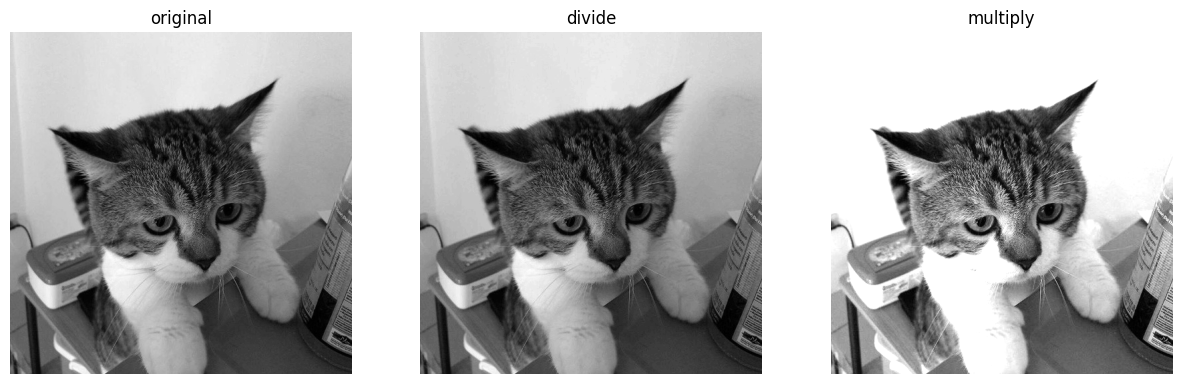

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

GAIN = 2

img = cv2.imread("kitty.jpg")

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img_div = cv2.divide(img_gray,GAIN)
img_mul = cv2.multiply(img_gray,GAIN)

# Write your code to visualize the results

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_gray,cmap='gray')
plt.axis('off')
plt.title("original")

plt.subplot(1, 3, 2)
plt.axis('off')
plt.imshow(img_div,cmap='gray')
plt.title("divide")

plt.subplot(1, 3, 3)
plt.imshow(img_mul,cmap='gray')
plt.axis('off')
plt.title("multiply")

plt.show()

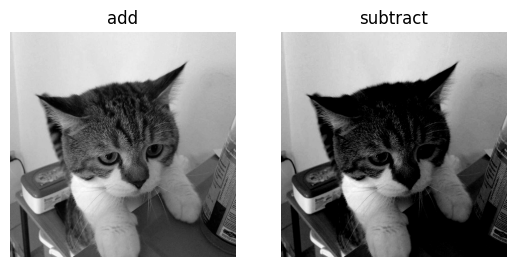

In [10]:
# TO DO : use the bias of 50 and -50
img_add = cv2.add(img_gray,50)
img_sub = cv2.subtract(img_gray,50)

_, axarr = plt.subplots(1,2)

axarr[0].imshow(img_add,cmap='gray')
axarr[0].axis('off')
axarr[0].set_title("add")

axarr[1].imshow(img_sub,cmap='gray')
axarr[1].axis('off')
axarr[1].set_title("subtract")

plt.show()

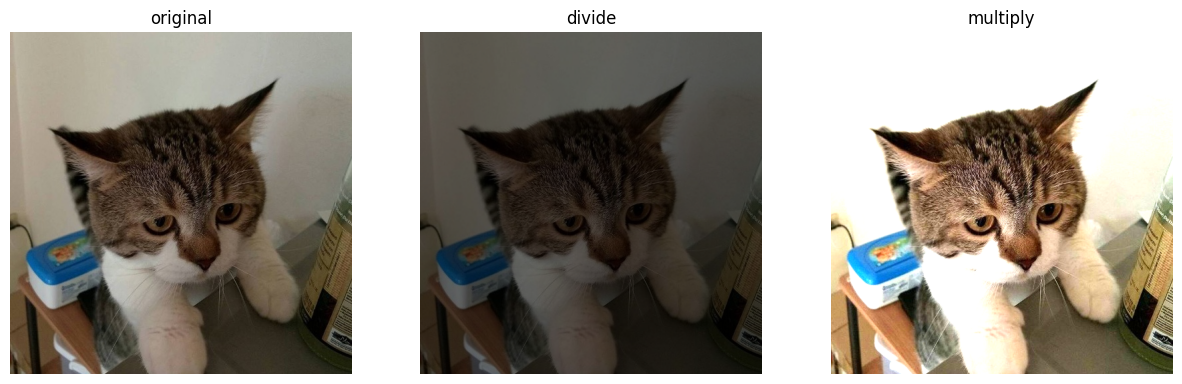

In [ ]:
# Playing with RGB image


# working with RGB
GAIN = (2,2,2,1)
img = cv2.imread("kitty.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_div = cv2.divide(img_rgb,GAIN)
img_mul = cv2.multiply(img_rgb,GAIN)

# Write your code to visualize the results
plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.axis('off')
plt.title("original")

plt.subplot(1, 3, 2)
plt.imshow(img_div)
plt.axis('off')
plt.title("divide")

plt.subplot(1, 3, 3)
plt.imshow(img_mul)
plt.axis('off')
plt.title("multiply")

plt.show()

## Exercise #4 Color Models

Select one of the following color models, visualize each component in the model and analyze the results
-------
* HSV
* YCbCr
* CIELAB

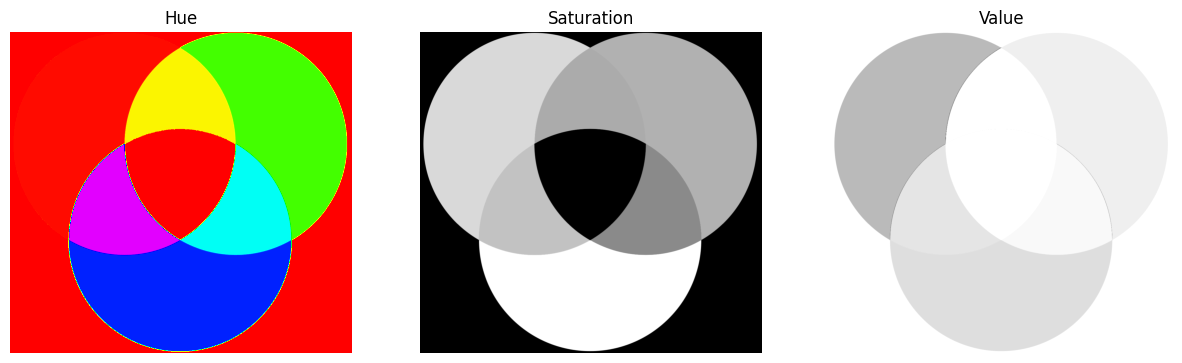

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("rgb.png")
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Visualize each component
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_hsv[:,:,0], cmap='hsv')
plt.title("Hue")
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(img_hsv[:,:,1], cmap='gray')
plt.title("Saturation")
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(img_hsv[:,:,2], cmap='gray')
plt.title("Value")
plt.axis('off')

plt.show()